<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3 - Web APIs & NLP (Part 2)

### Contents:
- Data Cleaning
- Pre-Processing & EDA
- Sentiment Analysis

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Preprocessing
import re
from bs4 import BeautifulSoup
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer


#Sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
#Importing the 'yoga_nlp.csv' and 'pilates_nlp.csv' datasets to clean and understand them

yoga = pd.read_csv('./yoga_nlp.csv')
pilates = pd.read_csv('./pilates_nlp.csv')

In [3]:
#Combining 'title' and 'selftext' into 1 column for cleaning for yoga
#Dropping 'title' and 'selftext' as it is a duplicate of the 'content' column for yoga

yoga['content']=yoga['title'] +' '+ yoga['selftext']
yoga.drop(['title', 'selftext'], axis=1, inplace=True)
yoga.head()

,subreddit,content
0,yoga,Ankle Swelling From Yoga? I recently signed up...
1,yoga,Are cork yoga mats better than a regular mat? ...
2,yoga,Found My New Yoga Studio I just moved to Hende...
3,yoga,We have started going to classes! I’m sure you...
4,yoga,How long did it take you to get good at yoga? ...


In [4]:
#Combining 'title' and 'selftext' into 1 column for cleaning for pilates
#Dropping 'title' and 'selftext' as it is a duplicate of the 'content' column for pilates

pilates['content']=pilates['title'] +' '+ pilates['selftext']
pilates.drop(['title', 'selftext'], axis=1, inplace=True)
pilates.head()

,subreddit,content
0,pilates,Thoughts on BB IQ reformer? Does anybody have ...
1,pilates,Hundred - I’m doing it wrong I don’t feel anyt...
2,pilates,Mini pro or reformer Hi there!\n\nI am new to ...
3,pilates,Should I tip my instructor for private session...
4,pilates,Looking to Purchase Reformer - Seeking Advice/...


In [5]:
#Checking for missing values for Yoga

print(yoga.info())
print(yoga.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  1000 non-null   object
 1   content    993 non-null    object
dtypes: object(2)
memory usage: 15.8+ KB
None
subreddit    0
content      7
dtype: int64


In [6]:
#Checking for missing values for Pilates

print(pilates.info())
print(pilates.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  1000 non-null   object
 1   content    998 non-null    object
dtypes: object(2)
memory usage: 15.8+ KB
None
subreddit    0
content      2
dtype: int64


In [7]:
#Will be dropping these rows with missing values in Yoga as they are not useful to us

yoga[yoga.content.isnull()==True]

,subreddit,content
17,yoga,NaN
145,yoga,NaN
146,yoga,NaN
898,yoga,NaN
900,yoga,NaN
901,yoga,NaN
946,yoga,NaN


In [8]:
#Checking that there is no missing value left in Yoga

yoga.dropna(axis=0, inplace=True)
print(yoga.isnull().sum())
print(yoga.shape)

subreddit    0
content      0
dtype: int64
(993, 2)


In [9]:
#Will be dropping these rows with missing values in Pilates as they are not useful to us

pilates[pilates.content.isnull()==True]

,subreddit,content
521,pilates,NaN
523,pilates,NaN


In [10]:
#Checking that there is no missing value left in Pilates

pilates.dropna(axis=0, inplace=True)
print(pilates.isnull().sum())
print(pilates.shape)

subreddit    0
content      0
dtype: int64
(998, 2)


In [11]:
#Checking that there is no duplicated rows in Yoga
#Will be dropping these rows

yoga_dup = yoga.duplicated()==True
yoga[yoga_dup]

,subreddit,content
336,yoga,How do I get back into yoga without feeling so...
350,yoga,Yoga History and Philosophy Discussion Thread ...
402,yoga,Asana Questions Thread Ask questions/discuss a...
641,yoga,Asana Questions Thread Ask questions/discuss a...
797,yoga,Yoga History and Philosophy Discussion Thread ...
854,yoga,Asana Questions Thread Ask questions/discuss a...
878,yoga,I just wrapped up my first month back in the y...


In [12]:
#Checking that there is no duplicated rows in Pilates
#Will be dropping these rows

pilates_dup = pilates.duplicated()==True
pilates[pilates_dup]

,subreddit,content
98,pilates,North Dallas studios I was paying for private ...
99,pilates,North Dallas studios I was paying for private ...


In [13]:
yoga.drop_duplicates(keep='first', inplace=True)
print(yoga.shape)

(986, 2)


In [14]:
pilates.drop_duplicates(keep='first', inplace=True)
print(pilates.shape)

(996, 2)


As per above findings, we have identified missing values and duplicates.
- For yoga
  - Dropped 7 posts with missing values
  - Dropped 7 post of duplicates
  - Left with 986 posts
- For pilates
  - Dropped 2 posts of missing values
  - Dropped 2 posts of duplicates
  - Left with 996 posts

Double checking that there is no empty (spacings), 'deleted' or 'removed' contents.

In [15]:
yoga[yoga['content']=='']

,subreddit,content


In [16]:
yoga[yoga['content']=='[deleted]']

,subreddit,content


In [17]:
yoga[yoga['content']=='[removed]']

,subreddit,content


In [18]:
pilates[pilates['content']=='']

,subreddit,content


In [19]:
pilates[pilates['content']=='[deleted]']

,subreddit,content


In [20]:
pilates[pilates['content']=='[removed]']

,subreddit,content


In [21]:
yoga.describe(include='object')

,subreddit,content
count,986,986
unique,1,986
top,yoga,Ankle Swelling From Yoga? I recently signed up...
freq,986,1


In [22]:
pilates.describe(include='object')

,subreddit,content
count,996,996
unique,1,996
top,pilates,Thoughts on BB IQ reformer? Does anybody have ...
freq,996,1


In [23]:
#Define function to clean content

def clean_text(content):

    # 1.Remove HTML.
    content_text = BeautifulSoup(content).get_text()
    
    # 2.Remove non-letters (e.g.punctuations, emojis etc.).
    letters_only = re.sub("[^a-zA-Z]", " ", content_text)
    
    # 3.Convert to lower case, split into individual words.
    words = letters_only.lower().split()
    
    # 4.Convert the stop words to a set & include words I want to remove into the set
    yoga_pilates = ['yoga', 'pilates', 'www', 'https', 'com', 'feel', 'feels', 'png' ]
    stops = set(stopwords.words('english') + yoga_pilates)
    
    # 5.Remove stop words.
    meaningful_words = [w for w in words if not w in stops]
    
    # 6.Join the words back into one string separated by space, 
    # and return the result.
    return(" ".join(meaningful_words))

In [24]:
#Apply clean_text function to yoga and pilates

yoga['content'] =yoga['content'].apply(clean_text)
pilates['content'] =pilates['content'].apply(clean_text)

/Users/twangxh/opt/anaconda3/lib/python3.9/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [25]:
yoga.head()

,subreddit,content
0,yoga,ankle swelling recently signed day pass local ...
1,yoga,cork mats better regular mat find get better w...
2,yoga,found new studio moved henderson nv ago studio...
3,yoga,started going classes sure get kind posts freq...
4,yoga,long take get good struggling core strength mo...


In [26]:
pilates.head()

,subreddit,content
0,pilates,thoughts bb iq reformer anybody experience bal...
1,pilates,hundred wrong anything abs hundred suggestions...
2,pilates,mini pro reformer hi new lagree attending stud...
3,pilates,tip instructor private session rule tip instru...
4,pilates,looking purchase reformer seeking advice help ...


In [27]:
#Vertically concatenating the 2 dataframes

nlp_df = pd.concat([yoga,pilates], axis=0)

In [28]:
#Mapping them to the respective binary

nlp_df['subreddit'] = nlp_df['subreddit'].map({'yoga': 0, 'pilates': 1})
nlp_df

,subreddit,content
0,0,ankle swelling recently signed day pass local ...
1,0,cork mats better regular mat find get better w...
2,0,found new studio moved henderson nv ago studio...
3,0,started going classes sure get kind posts freq...
4,0,long take get good struggling core strength mo...
...,...,...
995,1,advice often workout better mins ish fairly in...
996,1,keep getting lower back pain practicing starte...
997,1,advice hyper mobility getting started f cw hey...
998,1,need advice mom hello everyone mom inactive pa...


In [29]:
#Reseting index

nlp_df.reset_index(drop=True, inplace=True)
nlp_df

,subreddit,content
0,0,ankle swelling recently signed day pass local ...
1,0,cork mats better regular mat find get better w...
2,0,found new studio moved henderson nv ago studio...
3,0,started going classes sure get kind posts freq...
4,0,long take get good struggling core strength mo...
...,...,...
1977,1,advice often workout better mins ish fairly in...
1978,1,keep getting lower back pain practicing starte...
1979,1,advice hyper mobility getting started f cw hey...
1980,1,need advice mom hello everyone mom inactive pa...


## Pre-Processing & EDA

#### Lemmatizing

In [30]:
#Instantiate lemmatizer.

lemmatizer = WordNetLemmatizer()

In [31]:
#Define function to lemmatize the words.

def lemmatize_words(text):
    word = text.split()
    lemma_words = ''
    for i in word:
        lemma_words += lemmatizer.lemmatize(i) + ' '
    return lemma_words

In [32]:
#Apply lemmatize_words function to the content column in nlp_df

nlp_df['content'] = nlp_df['content'].apply(lemmatize_words)

In [33]:
nlp_df.head()

,subreddit,content
0,0,ankle swelling recently signed day pas local h...
1,0,cork mat better regular mat find get better wo...
2,0,found new studio moved henderson nv ago studio...
3,0,started going class sure get kind post frequen...
4,0,long take get good struggling core strength mo...


In [34]:
nlp_df.shape

(1982, 2)

In [35]:
nlp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1982 entries, 0 to 1981
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  1982 non-null   int64 
 1   content    1982 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.1+ KB


In [36]:
#Exporting the nlp_df into csv file

nlp_df.to_csv('final_nlp.csv', index = False)

#### Count Vectorizer

In [37]:
#Instantiate the "CountVectorizer" 
#Limiting the max features to 50 because I want to find the most frequently commented words.
#Using unigram and bigram because sometimes words such as 'happy' may be preceeded by 'not happy'.
#The former has a positive connotation while the latter has a negative connotation. 
#Hence it is important to also include bigram.

vectorizer = CountVectorizer(analyzer = "word",
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = None,
                             max_features = 50,
                            ngram_range=(1,2)) 

In [38]:
vector_yoga = nlp_df[nlp_df['subreddit'] == 0]['content']

In [39]:
features_yoga = vectorizer.fit_transform(vector_yoga)
features_yoga = features_yoga.toarray()

In [40]:
#Getting yoga top 50 features (aka words) to visualise in Word Cloud

vocab_yoga = vectorizer.get_feature_names()
print(vocab_yoga)

['also', 'anyone', 'back', 'beginner', 'body', 'class', 'could', 'day', 'even', 'find', 'get', 'go', 'good', 'help', 'hi', 'know', 'leg', 'life', 'like', 'looking', 'lot', 'love', 'make', 'mat', 'month', 'much', 'need', 'new', 'one', 'pain', 'people', 'pose', 'practice', 'practicing', 'really', 'something', 'started', 'studio', 'teacher', 'thanks', 'thing', 'think', 'time', 'video', 'want', 'way', 'week', 'work', 'would', 'year']


/Users/twangxh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [41]:
yoga_content = str([i for i in vocab_yoga])

In [42]:
yoga_content = yoga_content.replace("'", "")

#### Word Cloud for Yoga

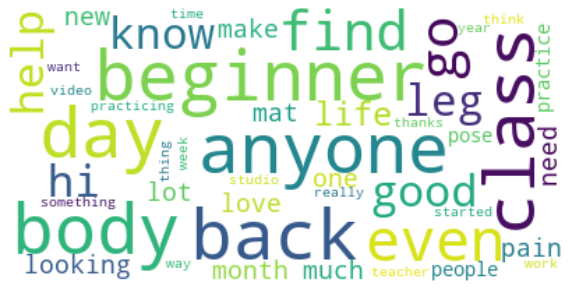

In [43]:
#Displaying the top 50 words for yoga via Word Cloud

wordcloud_yoga = WordCloud(max_font_size=50, max_words=50, background_color="white",
                     contour_width=2, contour_color='firebrick').generate(yoga_content)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud_yoga, interpolation="bilinear")
plt.axis("off")
plt.show()

In [44]:
vector_pilates = nlp_df[nlp_df['subreddit'] == 1]['content']

In [45]:
features_pilates = vectorizer.fit_transform(vector_pilates)
features_pilates = features_pilates.toarray()

In [46]:
#Getting pilates top 50 features (aka words) to visualise in Word Cloud

vocab_pilates = vectorizer.get_feature_names()
print(vocab_pilates)

['also', 'anyone', 'back', 'body', 'class', 'day', 'exercise', 'get', 'go', 'good', 'help', 'hi', 'home', 'instructor', 'know', 'like', 'looking', 'lot', 'love', 'make', 'mat', 'much', 'muscle', 'need', 'new', 'one', 'pain', 'people', 'practice', 'really', 'reformer', 'started', 'studio', 'teacher', 'thanks', 'thing', 'think', 'time', 'training', 'use', 'video', 'want', 'way', 'week', 'weight', 'work', 'workout', 'would', 'year', 'youtube']


In [47]:
pilates_content = str([i for i in vocab_pilates])

In [48]:
pilates_content = pilates_content.replace("'", "")

#### Word Cloud for Pilates

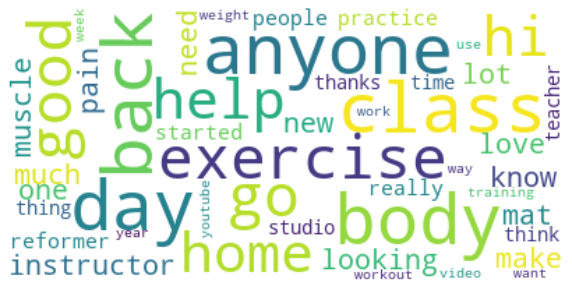

In [49]:
#Displaying the top 50 words for pilates via Word Cloud

wordcloud_pilates = WordCloud(max_font_size=50, max_words=50, background_color="white",
                     contour_width=2, contour_color='firebrick').generate(pilates_content)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud_pilates, interpolation="bilinear")
plt.axis("off")
plt.show()

From the word cloud, we notice that there are a few words that appear in both word clouds. The words are 'beginner', 'anyone', 'class', 'body'. 

It seems like the way people comment on reddit about yoga and pilates are similar.

#### Yoga Top 15 Common Words

In [50]:
#Getting yoga top 15 words to visualise in Bar Chart

nlp_yoga = nlp_df[nlp_df['subreddit'] == 0]['content']
cv = CountVectorizer()
cv.fit(nlp_yoga)

yoga_post_cv = cv.transform(nlp_yoga)
yoga_post_df = pd.DataFrame(yoga_post_cv.todense(), columns=cv.get_feature_names())

In [51]:
#Number of count each word appeared

yoga_top_words = pd.DataFrame(yoga_post_df.sum().sort_values(ascending=False)[:15], columns = ['Count'])
yoga_top_words.T

,like,pose,class,practice,back,get,time,day,really,would,know,anyone,one,help,year
Count,571,495,454,434,315,313,305,301,294,284,270,264,262,253,248


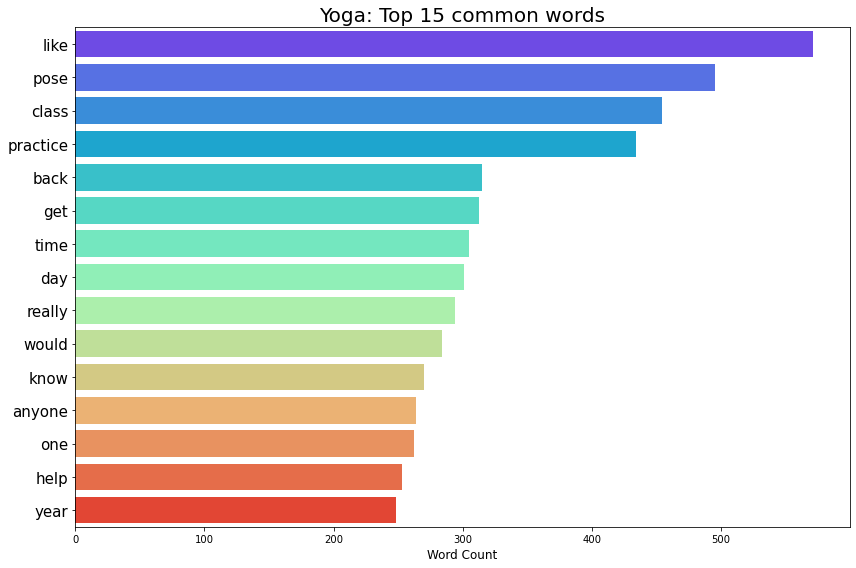

In [52]:
#Displaying the top 15 words for yoga via Bar Chart

import seaborn as sns

fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x='Count', y=yoga_top_words.index , data=yoga_top_words, palette = "rainbow")
plt.title('Yoga: Top 15 common words',fontsize=20)
plt.xlabel('Word Count', fontsize=12)
plt.yticks(fontsize=15)
plt.tight_layout()

#### Pilates Top 15 Common Words

In [53]:
#Getting yoga top 15 words to visualise in Bar Chart

nlp_pilates = nlp_df[nlp_df['subreddit'] == 1]['content']
cv = CountVectorizer()
cv.fit(nlp_pilates)

pilates_post_cv = cv.transform(nlp_pilates)
pilates_post_df = pd.DataFrame(pilates_post_cv.todense(), columns=cv.get_feature_names())

/Users/twangxh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [54]:
#Number of count each word appeared

pilates_top_words = pd.DataFrame(pilates_post_df.sum().sort_values(ascending=False)[:15], columns = ['Count'])
pilates_top_words.T

,class,reformer,like,body,would,exercise,instructor,anyone,get,time,studio,one,back,week,really
Count,644,561,464,418,351,347,337,325,318,314,303,302,293,290,283


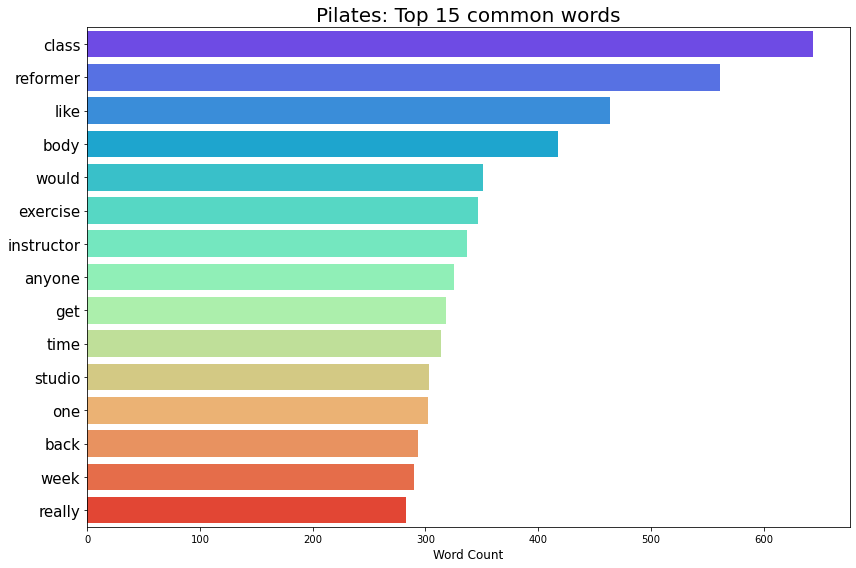

In [55]:
#Displaying the top 15 words for pilates via Bar Chart

fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x='Count', y=pilates_top_words.index , data=pilates_top_words, palette = "rainbow")
plt.title('Pilates: Top 15 common words',fontsize=20)
plt.xlabel('Word Count', fontsize=12)
plt.yticks(fontsize=15)
plt.tight_layout()

#### Top Common Words for both Yoga & Pilates (unigram & bigram)

In [56]:
# words that appear in both subreddits.
both_subreddits = []
for i in range(15):
    for j in range(15):
        if yoga_top_words.index[i] == pilates_top_words.index[j]:
            both_subreddits.append(yoga_top_words.index[i])
both_subreddits

['like', 'class', 'back', 'get', 'time', 'really', 'would', 'anyone', 'one']

In [57]:
yoga_words = list(yoga_top_words.index)
pilates_words = list(pilates_top_words.index)
print('====== Both =======')
print(both_subreddits)
print('=====Yoga=====')
print([x for x in yoga_words if x not in set(pilates_words)])
print('=====Pilates=====')
print([x for x in pilates_words if x not in set(yoga_words)])

====== Both =======
['like', 'class', 'back', 'get', 'time', 'really', 'would', 'anyone', 'one']
=====Yoga=====
['pose', 'practice', 'day', 'know', 'help', 'year']
=====Pilates=====
['reformer', 'body', 'exercise', 'instructor', 'studio', 'week']


After comparing the top 15 common words from each subreddit, we can see that people does use different words to comment on them.

Yoga: Words like 'pose' are common in yoga as there are a lot of different yoga poses.  

Pilates: Words like 'reformer' is unique to pilates subreddit as reformer is an equipment that is used during pilates. Hence, it would only appear in Pilates and not Yoga.

In [72]:
cv_bigrams = CountVectorizer(ngram_range=(2, 2), stop_words='english')
cv_bigrams.fit(yoga['content'])

bigrams_cv = cv_bigrams.transform(yoga['content'])
bigrams_df = pd.DataFrame(bigrams_cv.todense(), columns=cv_bigrams.get_feature_names())

bigrams_df.sum().sort_values(ascending=False).head(15)

yoga_top_biwords = pd.DataFrame(bigrams_df.sum().sort_values(ascending=False).head(15), columns = ['Count'])
yoga_top_biwords

/Users/twangxh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Count
downward dog,33
thanks advance,29
dog app,29
forward fold,27
months ago,26
preview redd,25
auto webp,25
width format,25
thank advance,24
mental health,23


From yoga's biwords, we can see that poses name like 'downward dog' and 'forward fold' are pretty common. Mental health is also mentioned quite frequent. As shared under outside research, yoga focus on the spiritual aspect as well. 

In [59]:
cv_bigrams = CountVectorizer(ngram_range=(2, 2), stop_words='english')
cv_bigrams.fit(pilates['content'])

bigrams_cv = cv_bigrams.transform(pilates['content'])
bigrams_df = pd.DataFrame(bigrams_cv.todense(), columns=cv_bigrams.get_feature_names())

bigrams_df.sum().sort_values(ascending=False).head(15)

pilates_top_biwords = pd.DataFrame(bigrams_df.sum().sort_values(ascending=False).head(15), columns = ['Count'])
pilates_top_biwords

/Users/twangxh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Count
balanced body,72
times week,62
youtube watch,40
reformer classes,38
reformer home,29
weight loss,29
really like,28
teacher training,28
thanks advance,27
group classes,24


From pilates's biwords, we can see that the word 'reformer' appeares in both unigram and bigram. People are very curious about having reformer at home as we can see 'reformer home' and 'home reformer'. The top biword is 'balanced body', people who are looking to tone their overall physique seems to prefer pilates.

### Sentiment Analysis

In [60]:
#Instantiate Sentiment Intensity Analyzer
sent = SentimentIntensityAnalyzer()

#Get the sentiment scores
sentiment = [sent.polarity_scores(i) for i in nlp_df.content]

In [61]:
sent_score_nlp_df = pd.DataFrame(sentiment)
sent_score_nlp_df

,neg,neu,pos,compound
0,0.045,0.824,0.131,0.4404
1,0.109,0.442,0.449,0.9201
2,0.174,0.826,0.000,-0.6908
3,0.114,0.478,0.408,0.9169
4,0.091,0.552,0.357,0.8020
...,...,...,...,...
1977,0.000,0.664,0.336,0.7269
1978,0.410,0.538,0.052,-0.9485
1979,0.023,0.786,0.191,0.8825
1980,0.066,0.747,0.187,0.4939


In [62]:
#Combine the dataframe and scores

sent_combine = pd.concat([nlp_df, sent_score_nlp_df], axis=1)

In [63]:
#Create column 'overall' to get a rough understanding on the sentiments

sent_combine['overall'] = 'neu'
for index, row in enumerate(sent_combine['compound']):
    if row <= -0.05:
        sent_combine['overall'][index] = 'neg'
    elif row >= 0.05:
        sent_combine['overall'][index] = 'pos'

/var/folders/yz/m088r3hn2gs5k6lxmcvz8z440000gn/T/ipykernel_37074/28606389.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_combine['overall'][index] = 'pos'
/var/folders/yz/m088r3hn2gs5k6lxmcvz8z440000gn/T/ipykernel_37074/28606389.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_combine['overall'][index] = 'neg'


In [64]:
sent_combine.head()

,subreddit,content,neg,neu,pos,compound,overall
0,0,ankle swelling recently signed day pas local h...,0.045,0.824,0.131,0.4404,pos
1,0,cork mat better regular mat find get better wo...,0.109,0.442,0.449,0.9201,pos
2,0,found new studio moved henderson nv ago studio...,0.174,0.826,0.000,-0.6908,neg
3,0,started going class sure get kind post frequen...,0.114,0.478,0.408,0.9169,pos
4,0,long take get good struggling core strength mo...,0.091,0.552,0.357,0.8020,pos


In [65]:
#Getting mean of each sentiment for each subreddit

sent_combine.groupby('subreddit').mean()

,neg,neu,pos,compound
subreddit,,,,
0,0.087971,0.665544,0.246469,0.504423
1,0.068131,0.701679,0.230179,0.548795


In [66]:
#Yoga's scores in terms of percentage

yoga_sent = sent_combine[sent_combine.subreddit== 0]
yoga_sent.overall.value_counts()*100/len(yoga_sent)

pos    79.310345
neg    15.821501
neu     4.868154
Name: overall, dtype: float64

In [67]:
#Pilate's scores in terms of percentage

pilates_sent = sent_combine[sent_combine.subreddit== 1]
pilates_sent.overall.value_counts()*100/len(pilates_sent)

pos    81.024096
neg    12.650602
neu     6.325301
Name: overall, dtype: float64

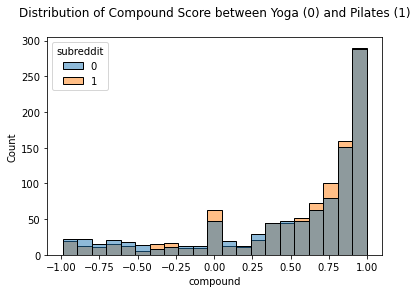

In [68]:
#Plotting out yoga and pilates compound score

sns.histplot(data=sent_combine, x='compound', hue='subreddit')
plt.title('Distribution of Compound Score between Yoga (0) and Pilates (1)\n');

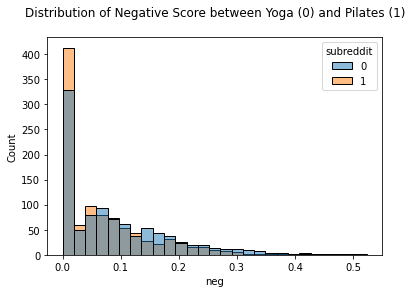

In [69]:
#Plotting out yoga and pilates negative score

sns.histplot(data=sent_combine, x='neg', hue='subreddit')
plt.title('Distribution of Negative Score between Yoga (0) and Pilates (1)\n');

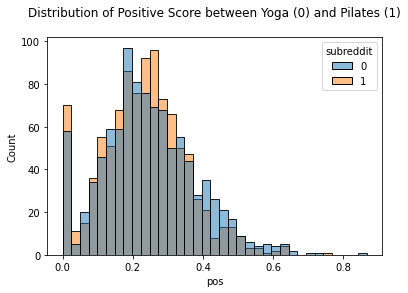

In [70]:
#Plotting out yoga and pilates positive score

sns.histplot(data=sent_combine, x='pos', hue='subreddit')
plt.title('Distribution of Positive Score between Yoga (0) and Pilates (1)\n');

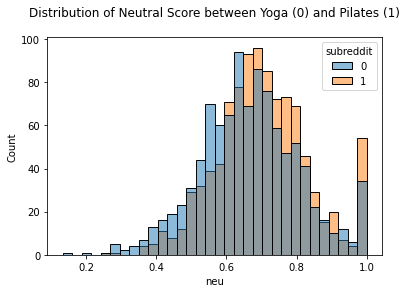

In [71]:
#Plotting out yoga and pilates neutral score

sns.histplot(data=sent_combine, x='neu', hue='subreddit');
plt.title('Distribution of Neutral Score between Yoga (0) and Pilates (1)\n');

| **Subreddit** | **Positive Sentiment** | **Neutral Sentiment** | **Negative Sentiment** |
|---------------|------------------------|-----------------------|------------------------|
| Yoga          | 79.31%                 | 4.87%                 | 15.82%                 |
| Pilates       | 81.02%                 | 6.33%                 | 12.65%                 |

Yoga and pilates sentiments are pretty similar. Based on our findings from our dataset, pilates's positive sentiment was higher than yoga's positive sentiment by 2%. Pilate's negative sentiment is lower than yoga's negative sentiment by 2%.

From this, we can see that the public's opinion and sentiment towards pilates are better than yoga. Hence, we are high likely able to increase pilates awareness.